In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

data = pd.read_csv('ex2data2.txt', header = None)
data.columns =['x','y','z']
data1 = pd.read_csv('ex2data2.txt', header = None)
data1.columns =['x','y','z']

data.head()

,x,y,z
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


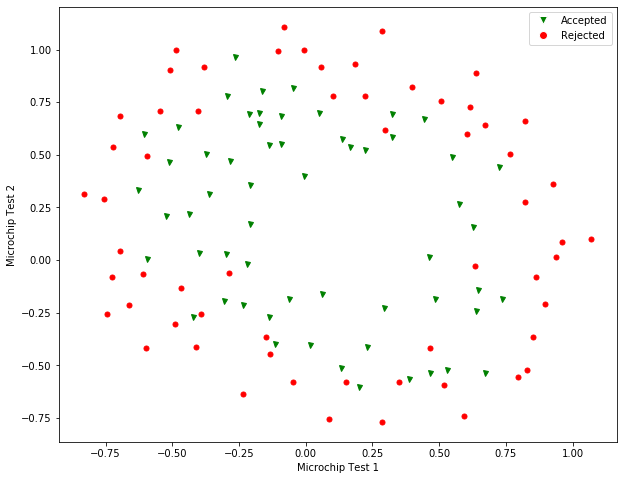

In [2]:
def plot_data(data):
    plt.figure(figsize=(10, 8))
    for index, row in data.iterrows():
        if row['z']==1:
            plt.plot(row.x, row.y, marker='v', linestyle='', markersize=5, color='green')
        if row['z']==0:
            plt.plot(row.x, row.y, marker='o', linestyle='', markersize=5, color='red')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    label = [Line2D([0], [0], marker='v' , color='w', label='Accepted', markerfacecolor='green', markersize=8),
             Line2D([0], [0], marker='o', color='w', label='Rejected', markerfacecolor='red', markersize=8)]
    plt.legend(handles=label)
    
plot_data(data)

In [3]:
#feature mapping
features=2
degree=6
data.insert(0, 'Ones', 1)
x = []
for n in range(1, features + 1):
    x.append(data.iloc[:, n])
for i in range(1, degree + 1):
    for j in range(0, i + 1):
        data['x' + str(i) + str(j)] = np.power(x[0], i-j) * np.power(x[1], j)

cols = [0, 1, 2]
data.drop(data.columns[cols], axis=1, inplace=True)
cols = data.columns.tolist()
cols = cols[1:] + [cols[0]]
data = data[cols]

print(data.shape)

(118, 28)


In [4]:
#preparing data
n = len(data.columns)-1
data.insert(0, 'w', 1)
x = data.iloc[:, 0:n+1]
y = data.iloc[:, n+1:n+2]

x = np.array(x.values)
y = np.array(y.values)
theta = np.zeros((n+1, 1))

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [6]:
def cost_function(theta, x, y, _lambda):
    m = len(x)
    h = sigmoid(np.dot(x, theta))
    regularization = ((1 / (2 * m)) * _lambda) * np.sum(np.square(theta[1:]))
    return (np.sum((1/m)*((np.dot(-y.T, np.log(h))) - (np.dot((1 - y).T, np.log(1 - h)))))) + regularization

print(cost_function(theta, x, y, 0))

0.6931471805599453


In [7]:
def gradient(theta, x, y, _lambda):
    m = len(x)
    h = sigmoid(np.dot(x, theta))
    j0= 1/m * np.dot(np.transpose(x), (h - y))[0]
    j1 = 1/m * np.dot(np.transpose(x), (h - y))[1:] + (_lambda/m)* theta[1:]
    return np.vstack((j0[:,np.newaxis],j1))

In [8]:
def gradient_descent(x,y,theta,alpha,num_iters,_lambda):
    m=len(y)
    J =[]
    for i in range(num_iters):
        cost = cost_function(theta,x,y,_lambda)
        _gradient = gradient(theta,x,y,_lambda)
        theta = theta - (alpha * _gradient)
        J.append(cost)
    
    return theta , J

[[ 1.27272666]
 [ 0.62526711]
 [ 1.18108002]
 [-2.01993057]
 [-0.91739552]
 [-1.43161788]
 [ 0.12401453]
 [-0.36554077]
 [-0.3572596 ]
 [-0.17511391]
 [-1.45816787]
 [-0.05101375]
 [-0.61556876]
 [-0.2747002 ]
 [-1.19282161]
 [-0.24218161]
 [-0.20601493]
 [-0.04475556]
 [-0.27778238]
 [-0.29538161]
 [-0.45637191]
 [-1.04321667]
 [ 0.02775438]
 [-0.29244176]
 [ 0.01555195]
 [-0.32738428]
 [-0.14388399]
 [-0.92468352]]


Text(0, 0.5, 'Cost')

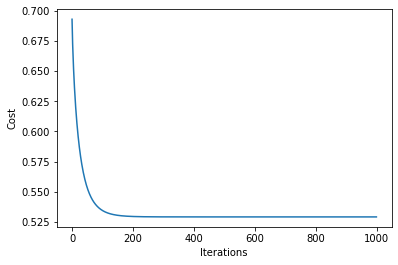

In [9]:
theta , J = gradient_descent(x,y,theta,1,1000,1)
print(theta)
plt.plot(J)
plt.xlabel("Iterations")
plt.ylabel("Cost")

In [10]:
def feature_plot(x1,x2,degree):
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
    return out

In [15]:
def decision_boundary(theta):
    
    plot_data(data1)
    
    u = np.linspace(-1,1.5,50)
    v= np.linspace(-1,1.5,50)
    z=np.zeros((len(u),len(v)))
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = np.dot (feature_plot(u[i],v[j],6), theta)
    plt.contour(u,v,z.T,0)

Text(0.5, 1.0, 'high regularization (underfitting) (lambda = 100)')

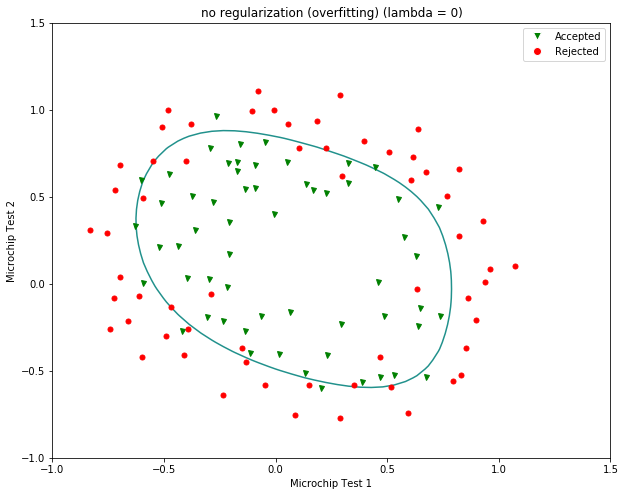

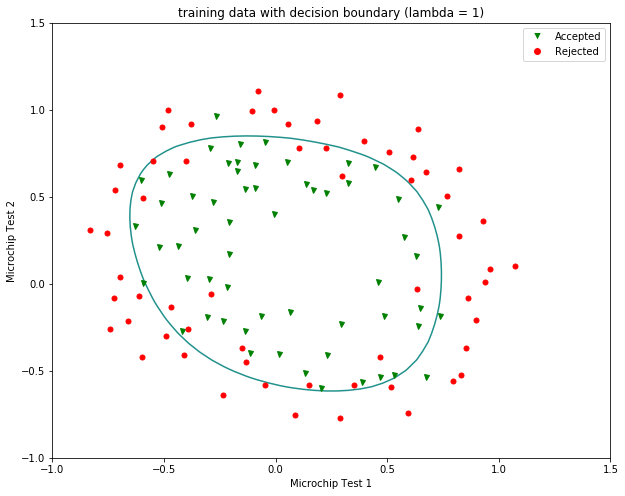

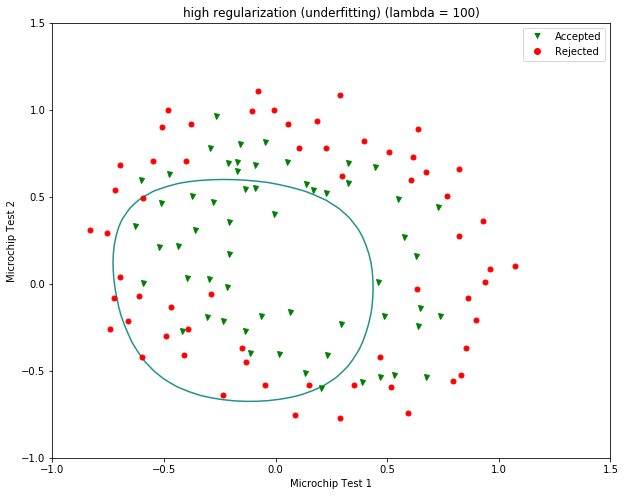

In [16]:
theta , J = gradient_descent(x,y,theta,1,2000, 0)
decision_boundary(theta)
plt.title('no regularization (overfitting) (lambda = 0)')

theta , J = gradient_descent(x,y,theta,1,2000, 1)
decision_boundary(theta)
plt.title('training data with decision boundary (lambda = 1)')

theta , J = gradient_descent(x,y,theta,1,2000, 100)
decision_boundary(theta)
plt.title('high regularization (underfitting) (lambda = 100)')